In [68]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
data=pd.read_csv("victoria_electricity_demand.csv", usecols=["demand", "temperature", "date_time"],
    index_col=["date_time"],
    parse_dates=["date_time"],)

In [70]:
data.head()

,demand,temperature
date_time,,
2002-01-01 00:00:00,6919.366092,32.6
2002-01-01 01:00:00,7165.974188,32.6
2002-01-01 02:00:00,6406.542994,32.6
2002-01-01 03:00:00,5815.537828,32.6
2002-01-01 04:00:00,5497.732922,32.6


the dataset consist of the data from 2002 to 2005 but we will take the data after 2010

In [71]:
data=data.loc["2010":]

In [72]:
data.head()

,demand,temperature
date_time,,
2010-01-01 00:00:00,8314.448682,21.525
2010-01-01 01:00:00,8267.187296,22.400
2010-01-01 02:00:00,7394.528444,22.150
2010-01-01 03:00:00,6952.047520,21.800
2010-01-01 04:00:00,6867.199634,20.250


Lets visulize the data data we have

<AxesSubplot:xlabel='date_time'>

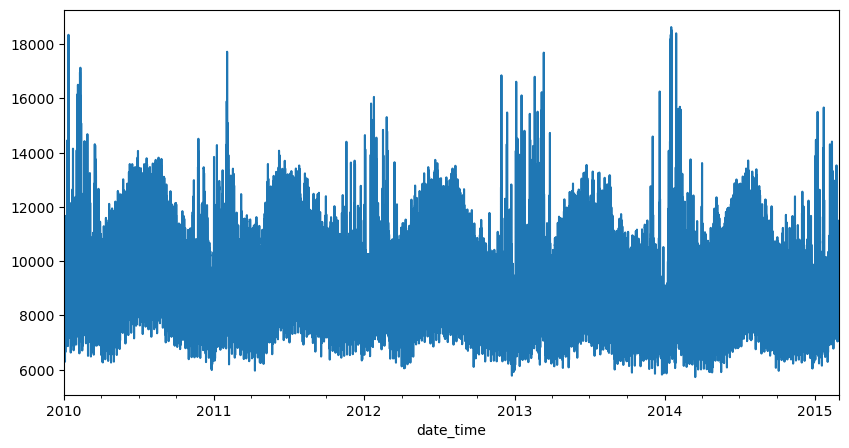

In [73]:
data["demand"].plot(figsize=[10,5])

Roughly we can say that the demand increases in summer and is low in winter

lets see the graph of demand in past recent years after 2014

<AxesSubplot:xlabel='date_time'>

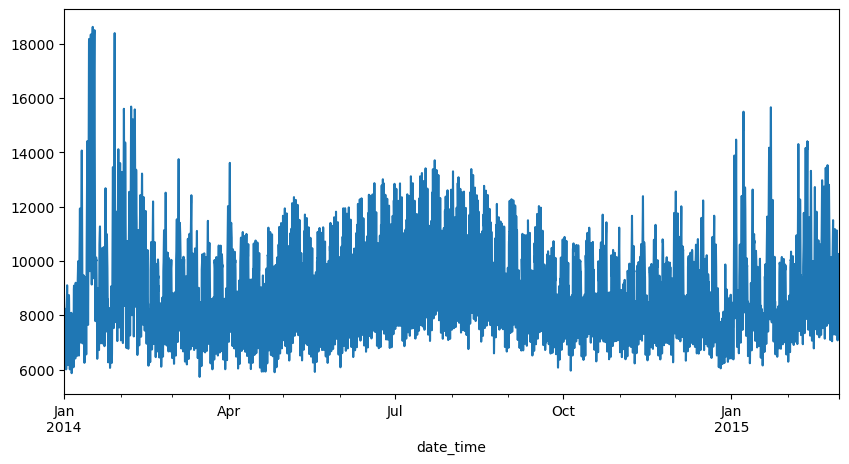

In [74]:
data["demand"].loc["2014":].plot(figsize=[10,5])

lets see the temperature graph after 2014

<AxesSubplot:xlabel='date_time'>

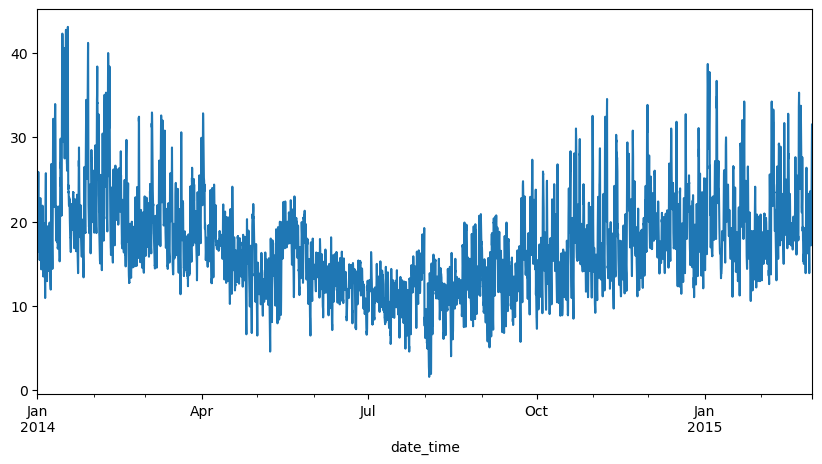

In [75]:
data['temperature'].loc["2014":].plot(figsize=(10,5))

now lets see the demand and temperature in single day

Text(0.5, 1.0, 'Daily Temperature')

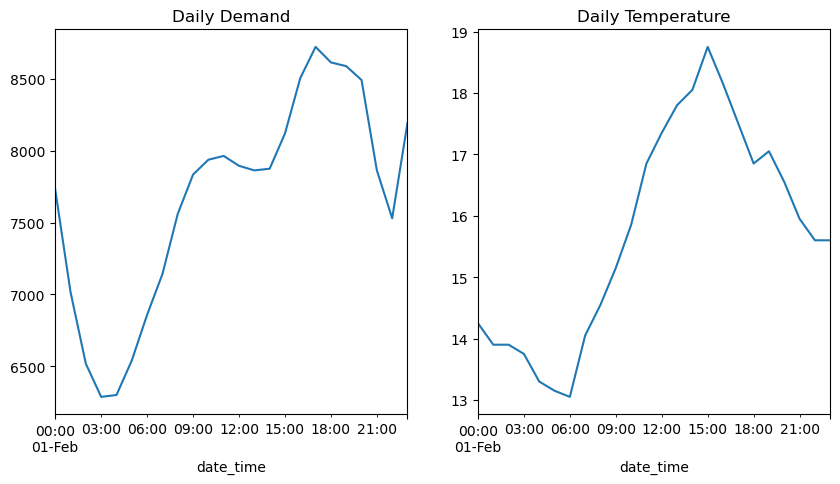

In [76]:
fig,ax=plt.subplots(ncols=2,figsize=[14,6])
data["demand"].loc["2015-02-01"].plot(figsize=[15,8],ax=ax[0])
ax[0].set_title("Daily Demand")


data["temperature"].loc["2015-02-01"].plot(figsize=[10,5],ax=ax[1])
ax[1].set_title("Daily Temperature")


From above graph it is clear that as temperature increases the demand of electricity increases

# Rolling windows using pandas

In [77]:
df=data.copy()

we will be computing  rolling mean and standard deviation 

In [78]:
Roll=(df["demand"].rolling(
window=24 #window size
).agg(["mean","std"]).
      shift(freq="1H")#lag by one hour
     
     )
Roll=Roll.add_prefix("demand_window_24")

In [79]:
Roll

,demand_window_24mean,demand_window_24std
date_time,,
2010-01-01 01:00:00,NaN,NaN
2010-01-01 02:00:00,NaN,NaN
2010-01-01 03:00:00,NaN,NaN
2010-01-01 04:00:00,NaN,NaN
2010-01-01 05:00:00,NaN,NaN
...,...,...
2015-02-28 20:00:00,8786.593557,957.615692
2015-02-28 21:00:00,8764.566712,948.645664
2015-02-28 22:00:00,8750.681279,952.771813


In [80]:
df=df.join(Roll,how="left")

In [81]:
df.head()

,demand,temperature,demand_window_24mean,demand_window_24std
date_time,,,,
2010-01-01 00:00:00,8314.448682,21.525,NaN,NaN
2010-01-01 01:00:00,8267.187296,22.400,NaN,NaN
2010-01-01 02:00:00,7394.528444,22.150,NaN,NaN
2010-01-01 03:00:00,6952.047520,21.800,NaN,NaN
2010-01-01 04:00:00,6867.199634,20.250,NaN,NaN


at first there are many missing data to fill that missing data we will use min_periods argument it helps us to reduce missing data

In [83]:
Roll=(df["demand"].rolling(
window=24,min_periods=1 #window size
).agg(["mean","std"]).
      shift(freq="1H")#lag by one hour
     
     )
Roll=Roll.add_prefix("demand_window_24")


In [84]:

Roll.head()

,demand_window_24mean,demand_window_24std
date_time,,
2010-01-01 01:00:00,8314.448682,NaN
2010-01-01 02:00:00,8290.817989,33.418847
2010-01-01 03:00:00,7992.054807,518.012283
2010-01-01 04:00:00,7732.052986,670.294667
2010-01-01 05:00:00,7559.082315,697.542450


# Using Feautre Engine Library

extracting windows features using feature engine library

In [87]:
from feature_engine.timeseries.forecasting import WindowFeatures

In [88]:
df=data.copy()

In [93]:
transformer=WindowFeatures(
variables=["demand","temperature"],
functions=["mean","std"],
window=[24,24*7,24*365],
freq="1H"
)
df=transformer.fit_transform(df)
df

,demand,temperature,demand_window_24_mean,demand_window_24_std,temperature_window_24_mean,temperature_window_24_std,demand_window_168_mean,demand_window_168_std,temperature_window_168_mean,temperature_window_168_std,demand_window_8760_mean,demand_window_8760_std,temperature_window_8760_mean,temperature_window_8760_std
date_time,,,,,,,,,,,,,,
2010-01-01 00:00:00,8314.448682,21.525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,8267.187296,22.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,7394.528444,22.150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 03:00:00,6952.047520,21.800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 04:00:00,6867.199634,20.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-02-28 19:00:00,9596.777060,28.350,8802.565712,974.759690,21.856250,5.141695,9670.463454,1539.992921,21.085714,4.840353,9169.130177,1597.845042,16.279344,5.272056
2015-02-28 20:00:00,8883.230296,22.200,8786.593557,957.615692,22.216667,5.285145,9654.616819,1526.838185,21.069048,4.810218,9169.143383,1597.848099,16.280348,5.273518
2015-02-28 21:00:00,8320.260550,18.900,8764.566712,948.645664,22.360417,5.233421,9638.018555,1519.920008,21.031845,4.776845,9169.122487,1597.850641,16.280713,5.273817


# Rolling window meann

Text(0.5, 0, 'Time')

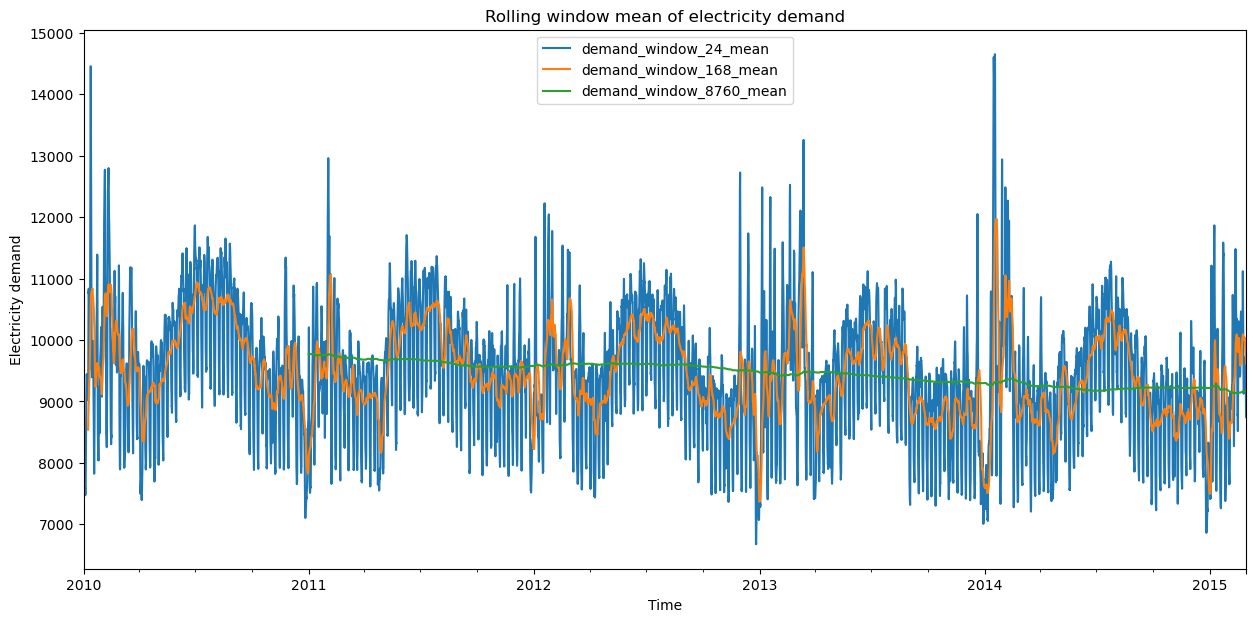

In [101]:
ax=df.filter(regex="demand_.*?_mean",#any number or character between demand and mean
             axis=1,
            ).plot(figsize=[15,7])
ax.set_title("Rolling window mean of electricity demand")
ax.set_ylabel("Electricity demand")
ax.set_xlabel("Time")

We can see how different window sizes have smoothed over different seasonalities. This allows the model to make use of behaviours seen at different time scales (e.g., if the daily average of the demand is greater than the average of the past year then perhaps this can influence future values of our target variable).

## Using sktime

In [103]:
from sktime.transformations.series.summarize import WindowSummarizer

In [104]:
df=data.copy()

In [105]:
transformer = WindowSummarizer(
    lag_feature={
        "lag": [1, 2, 3],  # Lag features.
        "mean": [[1, 24], [1, 24*7]],  # [[lag, window size]]
        "std": [[1, 24], [3, 24*7]],
    },
    target_cols=["demand"],
)

result = transformer.fit_transform(df)
result

,demand_lag_1,demand_lag_2,demand_lag_3,demand_mean_1_24,demand_mean_1_168,demand_std_1_24,demand_std_3_168,temperature
date_time,,,,,,,,
2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.525
2010-01-01 01:00:00,8314.448682,NaN,NaN,NaN,NaN,NaN,NaN,22.400
2010-01-01 02:00:00,8267.187296,8314.448682,NaN,NaN,NaN,NaN,NaN,22.150
2010-01-01 03:00:00,7394.528444,8267.187296,8314.448682,NaN,NaN,NaN,NaN,21.800
2010-01-01 04:00:00,6952.047520,7394.528444,8267.187296,NaN,NaN,NaN,NaN,20.250
...,...,...,...,...,...,...,...,...
2015-02-28 19:00:00,9979.909902,10258.585392,10019.921572,8802.565712,9670.463454,974.759690,1583.199789,28.350
2015-02-28 20:00:00,9596.777060,9979.909902,10258.585392,8786.593557,9654.616819,957.615692,1558.917200,22.200
2015-02-28 21:00:00,8883.230296,9596.777060,9979.909902,8764.566712,9638.018555,948.645664,1539.992921,18.900


In [106]:
df = result.join(df["demand"], how="left")
df

,demand_lag_1,demand_lag_2,demand_lag_3,demand_mean_1_24,demand_mean_1_168,demand_std_1_24,demand_std_3_168,temperature,demand
date_time,,,,,,,,,
2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.525,8314.448682
2010-01-01 01:00:00,8314.448682,NaN,NaN,NaN,NaN,NaN,NaN,22.400,8267.187296
2010-01-01 02:00:00,8267.187296,8314.448682,NaN,NaN,NaN,NaN,NaN,22.150,7394.528444
2010-01-01 03:00:00,7394.528444,8267.187296,8314.448682,NaN,NaN,NaN,NaN,21.800,6952.047520
2010-01-01 04:00:00,6952.047520,7394.528444,8267.187296,NaN,NaN,NaN,NaN,20.250,6867.199634
...,...,...,...,...,...,...,...,...,...
2015-02-28 19:00:00,9979.909902,10258.585392,10019.921572,8802.565712,9670.463454,974.759690,1583.199789,28.350,9596.777060
2015-02-28 20:00:00,9596.777060,9979.909902,10258.585392,8786.593557,9654.616819,957.615692,1558.917200,22.200,8883.230296
2015-02-28 21:00:00,8883.230296,9596.777060,9979.909902,8764.566712,9638.018555,948.645664,1539.992921,18.900,8320.260550
